In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/COMED_hourly_preprocessed.csv')
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [3]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Set the sequence length
seq_length = 24  

# Create training and testing sequences
X_train, y_train = create_sequences(train['COMED_MW_scaled'].values, seq_length)
X_test, y_test = create_sequences(test['COMED_MW_scaled'].values, seq_length)

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# The model parameters are carefully chosen to avoid overfitting by using dropout layers
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

2024-05-14 02:49:56.631037: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 02:49:57.790628: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-14 02:49:58.657171: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 02:49:58.670981: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Fo

In [5]:
data_test = test['COMED_MW_scaled'].values
X_test, y_test = create_sequences(data_test, seq_length)

In [6]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0981 - val_loss: 0.0053
Epoch 2/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0056 - val_loss: 0.0033
Epoch 3/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 4/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 5/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 6/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 8/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 9/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 11/30
1662/1662 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 12

In [7]:
test_loss = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

  1/415 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - loss: 0.0013

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [8]:
# Evaliate the model using MAE, MSE, and r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Absolute Error: 0.028905113919827596
Mean Squared Error: 0.001651195988175944
R^2 Score: 0.9974423371315515


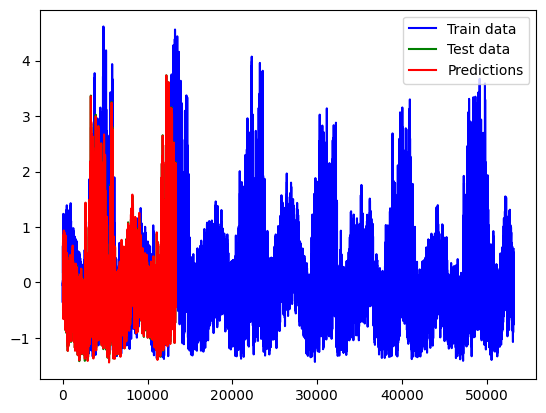

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, seq_length), y_train[:seq_length], color='b')
plt.plot(np.arange(seq_length, len(y_train)), y_train[seq_length:], color='b', label='Train data')
plt.plot(np.arange(seq_length, seq_length + len(y_test)), y_test, color='g', label='Test data')
plt.plot(np.arange(seq_length, seq_length + len(predictions)), predictions, color='r', label='Predictions')
plt.legend()
plt.show()

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


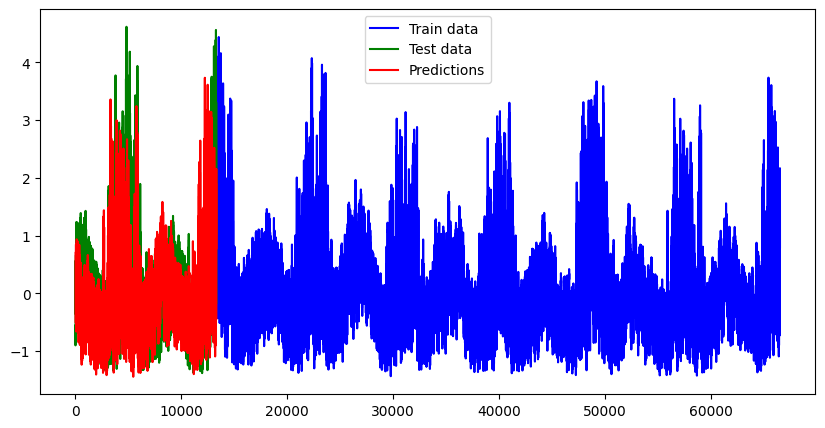

In [10]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test).flatten()
test_size = int(0.2 * len(df))
actual_prediction_start = seq_length
actual_prediction_end = actual_prediction_start + len(predictions)

df['Predictions'] = np.nan  

df.loc[actual_prediction_start:actual_prediction_end - 1, 'Predictions'] = predictions

df.to_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/LSTM_Predictions.csv', index=False)

plt.figure(figsize=(10, 5))
plt.plot(df.index[test_size:], df['COMED_MW_scaled'][test_size:], color='b', label='Train data')
plt.plot(df.index[:test_size], df['COMED_MW_scaled'][:test_size], color='g', label='Test data')
plt.plot(df.index[actual_prediction_start:actual_prediction_end], df['Predictions'][actual_prediction_start:actual_prediction_end], color='r', label='Predictions')
plt.legend()
plt.show()

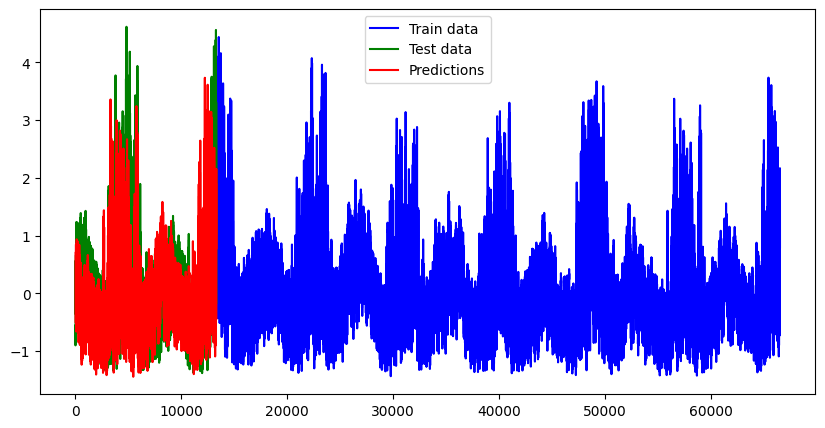

In [11]:
df = pd.read_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/LSTM_Predictions.csv')
plt.figure(figsize=(10, 5))
plt.plot(df.index[test_size:], df['COMED_MW_scaled'][test_size:], color='b', label='Train data')
plt.plot(df.index[:test_size], df['COMED_MW_scaled'][:test_size], color='g', label='Test data')
plt.plot(df.index[actual_prediction_start:actual_prediction_end], df['Predictions'][actual_prediction_start:actual_prediction_end], color='r', label='Predictions')
plt.legend()
plt.show()

In [12]:
df.to_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/LSTM_Predictions.csv', index=False)

In [13]:
# Save the model
model.save('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/models/lstm_model.keras')

In [14]:
#load the model
from tensorflow.keras.models import load_model
model = load_model('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/models/lstm_model.keras')